In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
from upsetplot import UpSet

In [5]:
df_pred = pd.read_csv('/hpc/compgen/projects/gw_cfdna/snv_qs/nanopore-wgs/scripts/cyclomics_muts_predict/analyse_perread_new/csv_files_perregion/cycl_muts_predict_t2t_perread_mutinfo_step2.csv')
print(df_pred.shape)
df_pred.drop(columns=['Unnamed: 0'], inplace=True)
print(df_pred.columns)

for i, model_cov in enumerate(['dnn_c5', 'dnn_c10', 'dnn_c15', 'dnn_c20', 'dnn_c100', 'cnn_c5', 'cnn_c10', 'cnn_c15', 'cnn_c20', 'cnn_c100']):
    print(f'number of reads for {model_cov}: {df_pred[df_pred["model-cov"] == model_cov].shape[0]}')

(3941027, 19)
Index(['region', 'region_readid', 'pred-readid', 'pred-readid-short',
       'pred-NM', 'pred-align_length', 'pred-cigar', 'pred-score', 'model-cov',
       'pred-model-only', 'pred-cov-only', 'mut1', 'mut2', 'mut3', 'mut4',
       'mut5', 'NM-mut', 'pred-score-NM'],
      dtype='object')
number of reads for dnn_c5: 395957
number of reads for dnn_c10: 395957
number of reads for dnn_c15: 395954
number of reads for dnn_c20: 395955
number of reads for dnn_c100: 395950
number of reads for cnn_c5: 374460
number of reads for cnn_c10: 396703
number of reads for cnn_c15: 396695
number of reads for cnn_c20: 396691
number of reads for cnn_c100: 396705


In [6]:
df_cons = pd.read_csv('/hpc/compgen/projects/gw_cfdna/snv_qs/nanopore-wgs/scripts/cyclomics_muts_predict/analyse_perread_new/csv_files_perregion/cycl_muts_consensus_t2t_perread_mutinfo_step2.csv')
print(df_cons.shape)
df_cons.drop(columns=['Unnamed: 0'], inplace=True)
print(df_cons.columns)

print(df_cons['region'].value_counts())

(390071, 19)
Index(['region_readid', 'region', 'cons-readid', 'cons-readid-short',
       'cons-NM', 'cons-YM', 'cons-YR', 'cons-align_length', 'cons-cigar',
       'cons-score', 'model-cov', 'mut1', 'mut2', 'mut3', 'mut4', 'mut5',
       'NM-mut', 'cons-score-NM'],
      dtype='object')
region3    140383
region5    100936
region4     83705
region2     38908
region1     26139
Name: region, dtype: int64


In [7]:
# plt.figure(1)
# plt.rcParams['figure.figsize'] = [110, 10]
# sns.barplot(data = df_cons, x = 'cons-YM', y = 'cons-NM')
# plt.xticks(rotation='vertical')
# plt.show()

# # plt.figure(2)
# # plt.rcParams['figure.figsize'] = [20, 10]
# # sns.barplot(data = df_cons, x = 'cons-YM', y = 'NM-mut')
# # plt.xlim(0,50)
# # plt.tight_layout()
# # plt.show()
# # plt.savefig('error_rate.png')

In [8]:
# print(df_pred[df_pred['model-cov'] == 'dnn_c20']['region_readid'].value_counts(ascending=True))
print(type(df_pred['region_readid'].value_counts(ascending=True)))
print((df_pred['region_readid'].value_counts(ascending=True).value_counts()))

<class 'pandas.core.series.Series'>
10    371485
9      22260
5       5132
4         23
8          8
7          3
Name: region_readid, dtype: int64


In [9]:
# pred_names = df_pred['region_readid'].tolist()
# cons_names = df_cons['region_readid'].tolist()
# print(len(pred_names))
# print(len(cons_names))

In [10]:
# print(f'original shape of predictions: {df_pred.shape}')
# print(f'original shape of consensus: {df_cons.shape}')
# df_pred_select = df_pred[df_pred['region_readid'].isin(cons_names)]
# print(f'subset of predictions: {df_pred_select.shape}')
# df_cons_select = df_cons[df_cons['region_readid'].isin(pred_names)]
# print(f'subset of consensus: {df_cons_select.shape}')

# print(df_pred_select['region_readid'].value_counts(ascending=True))



In [11]:

df_pred_select = df_pred.rename(columns = {'pred-readid': 'readid', 'pred-readid-short': 'readid-short', 'pred-NM':'NM', 'pred-align_length':'align_length', 'pred-cigar':'cigar', 'pred-score':'score', 'pred-score-NM':'score-NM'})
df_cons_select = df_cons.rename(columns = {'cons-readid': 'readid', 'cons-readid-short': 'readid-short', 'cons-NM':'NM', 'cons-align_length':'align_length', 'cons-cigar':'cigar', 'cons-score':'score', 'cons-score-NM':'score-NM'})
df_concat = pd.concat([df_cons_select, df_pred_select], join='outer')
print(df_concat.columns)
print(df_concat.shape)

# keep only readids that occur 11x = in all models + cycas
freq = df_concat['region_readid'].value_counts()
items = freq[freq == 11].index
df_concat = df_concat[df_concat['region_readid'].isin(items)]
df_concat.drop(columns = ['pred-model-only', 'pred-cov-only'], inplace = True)
print(df_concat['model-cov'].value_counts(ascending=True))
print(df_concat.shape)
print(df_concat.columns)
print(df_concat.head())

Index(['region_readid', 'region', 'readid', 'readid-short', 'NM', 'cons-YM',
       'cons-YR', 'align_length', 'cigar', 'score', 'model-cov', 'mut1',
       'mut2', 'mut3', 'mut4', 'mut5', 'NM-mut', 'score-NM', 'pred-model-only',
       'pred-cov-only'],
      dtype='object')
(4331098, 20)
Cycas Consensus    292100
cnn_c15            292100
dnn_c5             292100
cnn_c100           292100
cnn_c5             292100
dnn_c15            292100
dnn_c10            292100
dnn_c100           292100
dnn_c20            292100
cnn_c20            292100
cnn_c10            292100
Name: model-cov, dtype: int64
(3213100, 18)
Index(['region_readid', 'region', 'readid', 'readid-short', 'NM', 'cons-YM',
       'cons-YR', 'align_length', 'cigar', 'score', 'model-cov', 'mut1',
       'mut2', 'mut3', 'mut4', 'mut5', 'NM-mut', 'score-NM'],
      dtype='object')
                                  region_readid   region  \
1  region3_c0d8a839-bb59-4f02-9be6-d71500a104e6  region3   
3  region4_da5c7aa9-3447-

In [12]:
print(df_concat['region'].value_counts())

region3    1297153
region5     931733
region4     721402
region1     262812
Name: region, dtype: int64


In [13]:
yr = df_concat[df_concat['model-cov'] == 'Cycas Consensus']['cons-YR']
yr = yr.set_axis(df_concat[df_concat['model-cov'] == 'Cycas Consensus']['region_readid'])
print(yr.shape)

# df_concat.loc[df_concat[df_concat['model-cov'] == 'dnn_c5']['cons-YR']] = yr

(292100,)


In [14]:
# df_pred_select = df_pred.rename(columns = {'pred-readid': 'readid', 'pred-readid-short': 'readid-short', 'pred-NM':'NM', 'pred-align_length':'align_length', 'pred-cigar':'cigar', 'pred-score':'score', 'pred-score-NM':'score-NM'})
# df_cons_select = df_cons.rename(columns = {'cons-readid': 'readid', 'cons-readid-short': 'readid-short', 'cons-NM':'NM', 'cons-align_length':'align_length', 'cons-cigar':'cigar', 'cons-score':'score', 'cons-score-NM':'score-NM'})
# df_concat = pd.concat([df_cons_select, df_pred_select], join='inner')
# print(df_concat.columns)
# print(df_concat.shape)

# # keep only readids that occur 11x = in all models + cycas
# freq = df_concat['region_readid'].value_counts()
# items = freq[freq == 11].index
# df_concat = df_concat[df_concat['region_readid'].isin(items)]
# print(df_concat['model-cov'].value_counts(ascending=True))
# print(df_concat.shape)
# print(df_concat.columns)

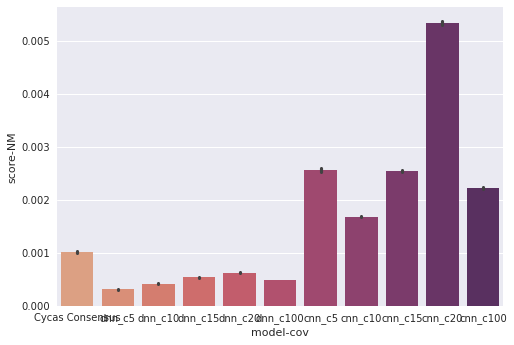

In [31]:
plt.figure(100)
# sns.set_palette(None)
plt.style.use('seaborn')
column_order = ['Cycas Consensus', 'dnn_c5', 'dnn_c10', 'dnn_c15', 'dnn_c20', 'dnn_c100', 'cnn_c5', 'cnn_c10', 'cnn_c15', 'cnn_c20', 'cnn_c100']
sns.barplot(data = df_concat, x = 'model-cov', y = 'score-NM', palette = "flare", order = column_order)
plt.show()


Using zero_method  wilcox
Cycas Consensus v.s. cnn_c15: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=9.183e+08
Using zero_method  wilcox
Cycas Consensus v.s. dnn_c5: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=2.364e+08
Using zero_method  wilcox
Cycas Consensus v.s. cnn_c100: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=8.700e+08
Using zero_method  wilcox
Cycas Consensus v.s. cnn_c5: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=6.857e+08
Using zero_method  wilcox
Cycas Consensus v.s. dnn_c15: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=4.988e+08
Using zero_method  wilcox
Cycas Consensus v.s. dnn_c10: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.000e+00 stat=3.593e+08
Using zero_method  wilcox
Cycas Consensus v.s. dnn_c100: Wilcoxon test (paired samples) with Bonferroni correction, P_val=0.0

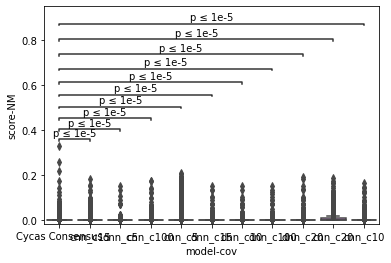

In [16]:
plt.figure()
ax = sns.boxplot(data=df_concat, x='model-cov', y='score-NM')
box_pairs = [('Cycas Consensus', 'dnn_c5'), ('Cycas Consensus', 'dnn_c10'), ('Cycas Consensus', 'dnn_c15'), ('Cycas Consensus', 'dnn_c20'), ('Cycas Consensus', 'dnn_c100'), ('Cycas Consensus', 'cnn_c5'), ('Cycas Consensus', 'cnn_c10'), ('Cycas Consensus', 'cnn_c15'), ('Cycas Consensus', 'cnn_c20'), ('Cycas Consensus', 'cnn_c100')]
add_stat_annotation(ax, data=df_concat, x='model-cov', y='score-NM', box_pairs = box_pairs, test='Wilcoxon', text_format='simple', loc='inside')
plt.show()

In [17]:
df_pivot = df_concat.pivot(index='region_readid', columns='model-cov', values = 'score-NM')

In [18]:
print(df_pivot.head(10))

model-cov                                     Cycas Consensus  cnn_c10  \
region_readid                                                            
region1_0002708b-baa9-4c0c-be98-c2aaa9bdeb7c              0.0      0.0   
region1_000360e1-5304-4ccb-8348-3ac74fe3a93f              0.0      0.0   
region1_000622cf-51c2-41e9-9498-812c4704698c              0.0      0.0   
region1_00081f23-b08e-4f15-b00f-05c70196af86              0.0      0.0   
region1_0011012e-cd05-4672-ac81-f194558b4cbe              0.0      0.0   
region1_00152456-8148-427e-b851-1694f9f4107c              0.0      0.0   
region1_001a305f-c267-45d3-aff5-3178d57508f1              0.0      0.0   
region1_001ac29d-8862-4915-abf5-0b51863f8022              0.0      0.0   
region1_001e0480-4ac4-418c-af3c-8d13c2d32003              0.0      0.0   
region1_001eff55-d740-4a85-ae8c-1859dd4b8ef4              0.0      0.0   

model-cov                                     cnn_c100  cnn_c15   cnn_c20  \
region_readid                     

In [19]:
yr = df_concat[df_concat['model-cov'] == 'Cycas Consensus']['cons-YR']
yr = yr.set_axis(df_concat[df_concat['model-cov'] == 'Cycas Consensus']['region_readid'])
print(yr)

print(df_pivot.columns)

df_yr = df_pivot.join(yr)
print(df_yr.head(10))

region_readid
region3_c0d8a839-bb59-4f02-9be6-d71500a104e6    R
region4_da5c7aa9-3447-4a0a-8073-51313219a15f    F
region4_6bceb6fa-6d0b-4c04-9518-e9168bb3b5cb    F
region4_602b7039-2f47-4a34-ba82-46d6d681ff0f    F
region4_b68d4942-9a73-435f-ad8b-f08970fbd09e    R
                                               ..
region3_8631f2fc-5caa-4567-968b-0b48e54857dc    R
region3_29c00268-eff0-4358-84df-e7f19d681bfc    F
region3_7c9a4171-02f0-4c88-970e-c63514c1bd6d    R
region3_9d28ec05-2b24-4eb8-9ab5-d4e56ea04ced    R
region3_79f40370-8482-484c-8286-a5010d716572    R
Name: cons-YR, Length: 292100, dtype: object
Index(['Cycas Consensus', 'cnn_c10', 'cnn_c100', 'cnn_c15', 'cnn_c20',
       'cnn_c5', 'dnn_c10', 'dnn_c100', 'dnn_c15', 'dnn_c20', 'dnn_c5'],
      dtype='object', name='model-cov')
                                              Cycas Consensus  cnn_c10  \
region_readid                                                            
region1_0002708b-baa9-4c0c-be98-c2aaa9bdeb7c              0

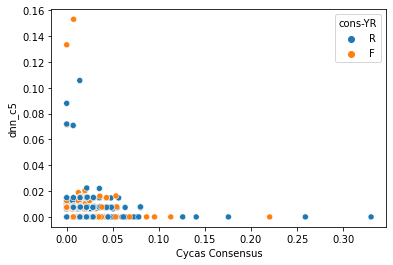

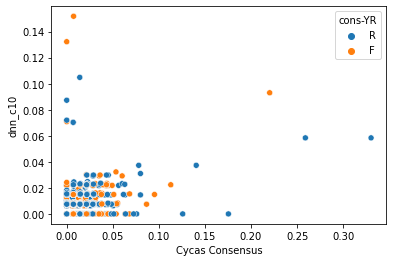

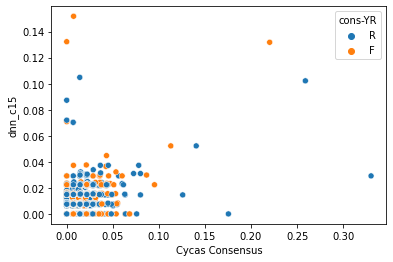

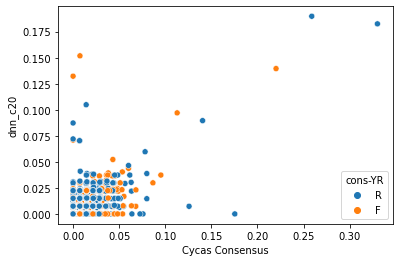

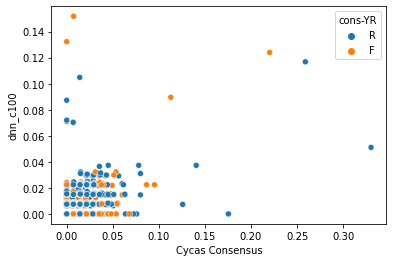

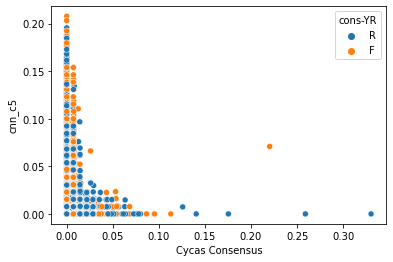

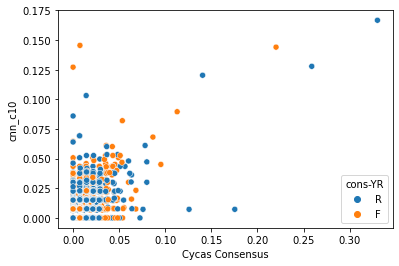

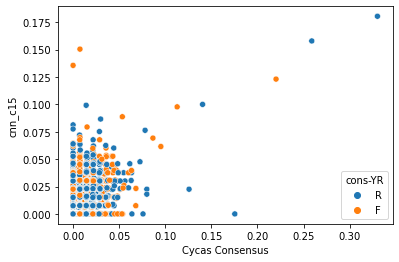

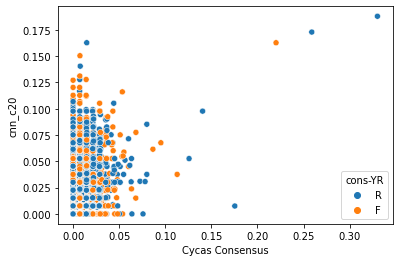

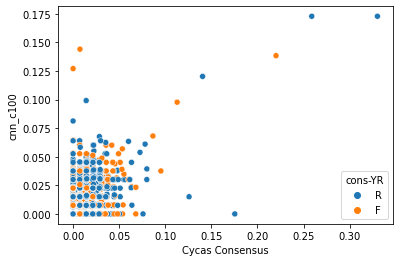

In [20]:
for i, model in enumerate(['dnn_c5', 'dnn_c10', 'dnn_c15', 'dnn_c20', 'dnn_c100', 'cnn_c5', 'cnn_c10', 'cnn_c15', 'cnn_c20', 'cnn_c100']):
    plt.figure(i)
    sns.scatterplot(data=df_yr, x='Cycas Consensus', y=model, hue = 'cons-YR')
    # plt.ylim(0, 0.25)
    # plt.xlim(0, 0.25)
    plt.show()

                                              Cycas Consensus  cnn_c10  \
region_readid                                                            
region1_0002708b-baa9-4c0c-be98-c2aaa9bdeb7c              0.0      0.0   

                                              cnn_c100  cnn_c15  cnn_c20  \
region_readid                                                              
region1_0002708b-baa9-4c0c-be98-c2aaa9bdeb7c       0.0      0.0      0.0   

                                              cnn_c5  dnn_c10  dnn_c100  \
region_readid                                                             
region1_0002708b-baa9-4c0c-be98-c2aaa9bdeb7c     0.0      0.0       0.0   

                                              dnn_c15  dnn_c20  dnn_c5 cons-YR  
region_readid                                                                   
region1_0002708b-baa9-4c0c-be98-c2aaa9bdeb7c      0.0      0.0     0.0       R  
Index(['Cycas Consensus', 'cnn_c10', 'cnn_c100', 'cnn_c15', 'cnn_c20',
       '

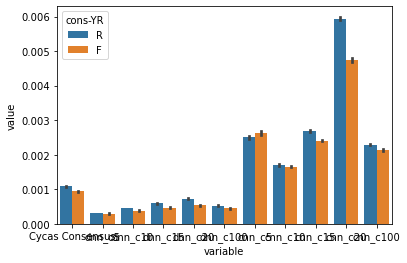

In [21]:
print(df_yr.head(1))
print(df_yr.columns)
df_yr['region_readid'] = df_yr.index
df_melt = pd.melt(df_yr, id_vars = ['region_readid', 'cons-YR'], value_vars = ['Cycas Consensus', 'dnn_c5', 'dnn_c10', 'dnn_c15', 'dnn_c20', 'dnn_c100', 'cnn_c5', 'cnn_c10', 'cnn_c15', 'cnn_c20', 'cnn_c100'])
print(df_melt.tail())
print(df_melt.shape)
plt.figure()
column_order = ['Cycas Consensus', 'dnn_c5', 'dnn_c10', 'dnn_c15', 'dnn_c20', 'dnn_c100', 'cnn_c5', 'cnn_c10', 'cnn_c15', 'cnn_c20', 'cnn_c100']
sns.barplot(data = df_melt, x = 'variable', y='value', hue = 'cons-YR')
plt.show()

<Figure size 432x288 with 0 Axes>

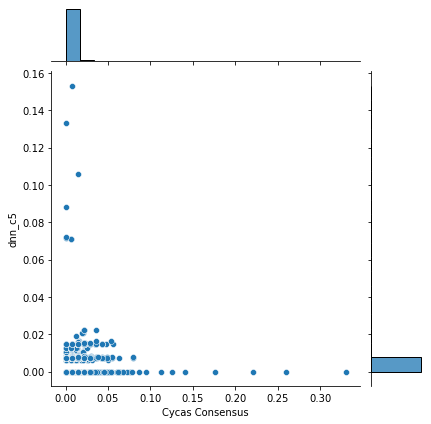

In [22]:
for i, model in enumerate(['dnn_c5', 'dnn_c10', 'dnn_c15', 'dnn_c20', 'dnn_c100', 'cnn_c5', 'cnn_c10', 'cnn_c15', 'cnn_c20', 'cnn_c100']):
    plt.figure(i)
    sns.jointplot(data=df_pivot, x='Cycas Consensus', y=model)
    # plt.ylim(0, 0.25)
    # plt.xlim(0, 0.25)
    plt.show()
    break